In [1]:
%matplotlib inline

# Load the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# First read the surveys and 
df_2017 = pd.read_csv( '2017 survey_results_public.csv', usecols =[ 'HaveWorkedLanguage' ], low_memory=False).dropna()
df_2017.rename(columns={ 'HaveWorkedLanguage' : 'Languages' }, inplace=True)
df_2017['Year'] = 2017
print ("There are %s valid records in 2017" % df_2017.shape[0])

df_2018 = pd.read_csv('2018 survey_results_public.csv', usecols =[ 'LanguageWorkedWith' ], low_memory=False).dropna()
df_2018.rename(columns={ 'LanguageWorkedWith' : 'Languages' }, inplace=True)
df_2018['Year'] = 2018
print ("There are %s valid records in 2018" % df_2018.shape[0])

df_2019 = pd.read_csv('2019 survey_results_public.csv', usecols =[ 'LanguageWorkedWith', ], low_memory=False).dropna()
df_2019.rename(columns={ 'LanguageWorkedWith' : 'Languages'}, inplace=True)
df_2019['Year'] = 2019
print ("There are %s valid records in 2019" % df_2019.shape[0])

df = pd.concat([df_2017,df_2018,df_2019],ignore_index=True)
del df_2017
del df_2018
del df_2019

print ("Total records : %s " % df.shape[0])

There are 36625 valid records in 2017
There are 78334 valid records in 2018
There are 87569 valid records in 2019
Total records : 202528 


In [2]:
# Now harmonize the data for all three years

# Some years had an extra space after the semicolon, remove the extra space
df["Languages"] = df["Languages"].str.replace('; ', ';',)

# In 2018 there was the choice for HTML and CSS seperatly, in 2019 HTML and CSS was one catagory. 
# So make it all to HTML
df["Languages"] = df["Languages"].str.replace("HTML;CSS", "HTML")
df["Languages"] = df["Languages"].str.replace("HTML/CSS", "HTML")
df["Languages"] = df["Languages"].str.replace("CSS", "HTML")

# In 2018 was Bash/Shell/PowerShell and in 2019 only Bash/Shell
df["Languages"] = df["Languages"].str.replace("Bash/Shell/PowerShell", "Bash/Shell")

In [3]:
# Calculate the number of programming languages per entry
# Count the number of Programming Languages per entry
df['Number_of_languages'] = df['Languages'].str.split(';').str.len()
print ("Average number of programming languages per user in :")
print ("- 2017 : %.2f " % df[df['Year']==2017]['Number_of_languages'].mean() )
print ("- 2018 : %.2f " % df[df['Year']==2018]['Number_of_languages'].mean() )
print ("- 2019 : %.2f " % df[df['Year']==2019]['Number_of_languages'].mean() )

Average number of programming languages per user in :
- 2017 : 3.79 
- 2018 : 5.56 
- 2019 : 5.03 


In [4]:
# Make the dataframe Lang_total with the count of used programming languages
Lang_total = df[['Languages', 'Year']]
Lang_total = pd.concat([pd.Series(row['Year'], row['Languages'].split(';'))              
                    for _, row in Lang_total.iterrows()]).reset_index()
Lang_total.columns = ['Language' , 'Year']

# Replace some languages that are relative small to reduce number of programming languages
ReplaceLanguages = {"Other(s):" : "Other",
                    "Delphi/Object Pascal" : "Other",
                    "Dart" : "Other",
                    "Elixir" : "Other",
                    "WebAssembly" : "Other",
                    "Cobol" : "Other",
                    "Julia" : "Other",
                    "Ocaml" : "Other",
                    "Hack" : "Other",
                    "Smalltalk" : "Other",
                    "Common Lisp" : "Other",
                    "Haskell" : "Other"
                    }

Lang_total["Language"].replace(ReplaceLanguages, inplace=True)

# Make the pivot table 
# Be patiant, this may take a few minutes...
Lang_total = Lang_total.pivot_table(index='Language', columns='Year', values='Language', aggfunc=len, 
                                   fill_value=np.nan
                                   ).reset_index()

# Calculate the extra rows
Lang_total['2017_perc'] = (Lang_total[2017]/(df[df['Year']==2017].shape[0]))*100
Lang_total['2018_perc'] = (Lang_total[2018]/(df[df['Year']==2018].shape[0]))*100
Lang_total['2019_perc'] = (Lang_total[2019]/(df[df['Year']==2019].shape[0]))*100

Lang_total['2018_trend'] = Lang_total['2018_perc'] - Lang_total['2017_perc']
Lang_total['2019_trend'] = Lang_total['2019_perc'] - Lang_total['2018_perc']

Lang_total.fillna(value=0, inplace=True)
Lang_total['Total'] = Lang_total[2017]+Lang_total[2018]+Lang_total[2019]

Lang_total.sort_values('Total', ascending=False, inplace=True)
Lang_total.reset_index()
Lang_total

Year,Language,2017,2018,2019,2017_perc,2018_perc,2019_perc,2018_trend,2019_trend,Total
13,JavaScript,22875.0,54686,59219.0,62.457338,69.811321,67.625530,7.353983,-2.185791,136780.0
25,SQL,18754.0,44670,47544.0,51.205461,57.025047,54.293186,5.819586,-2.731861,110968.0
11,HTML,0.0,54532,55466.0,0.000000,69.614727,63.339766,0.000000,-6.274960,109998.0
12,Java,14524.0,35521,35917.0,39.655973,45.345572,41.015656,5.689599,-4.329915,85962.0
21,Python,11704.0,30359,36443.0,31.956314,38.755840,41.616325,6.799526,2.860485,78506.0
3,C#,12476.0,26954,27097.0,34.064164,34.409069,30.943599,0.344905,-3.465470,66527.0
1,Bash/Shell,0.0,31172,31991.0,0.000000,39.793704,36.532335,0.000000,-3.261369,63163.0
19,PHP,10290.0,24071,23030.0,28.095563,30.728675,26.299261,2.633112,-4.429413,57391.0
4,C++,8155.0,19872,20524.0,22.266212,25.368295,23.437518,3.102083,-1.930777,48551.0
2,C,6974.0,18042,18017.0,19.041638,23.032144,20.574633,3.990506,-2.457512,43033.0


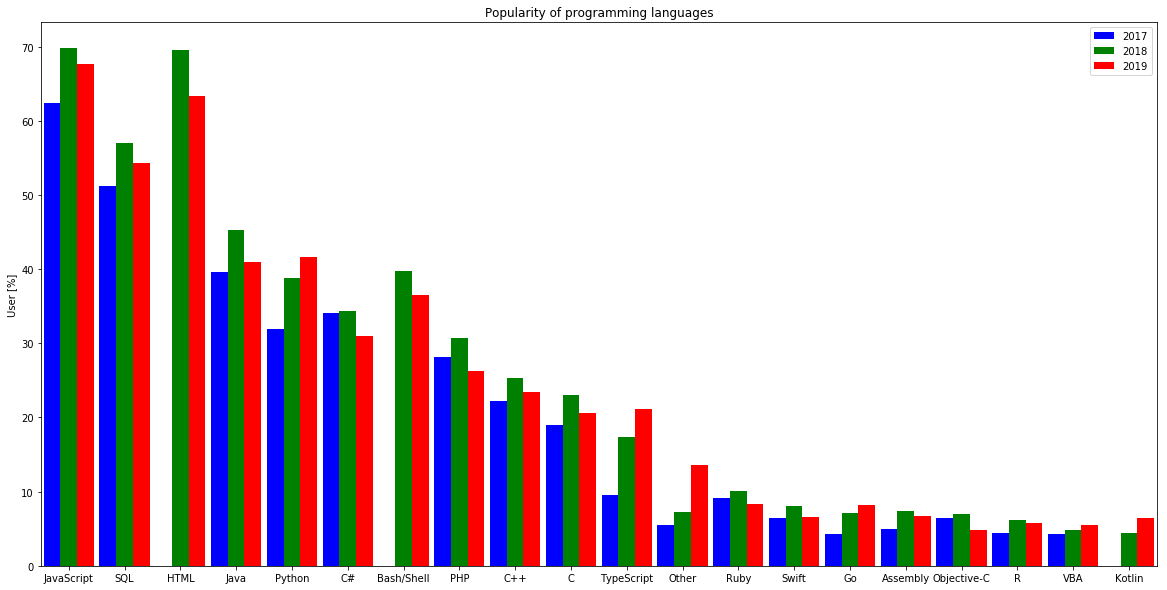

In [5]:
# Make the graph for the 20 most popular langages
Lang_total_graph = Lang_total[:20]

fig, ax = plt.subplots(figsize=(20,10))

bar_width = 0.3
index = np.arange(Lang_total_graph.shape[0])

plt.bar(index - bar_width, 
        Lang_total_graph['2017_perc'], 
        bar_width,
        color='b',
        label='2017')

plt.bar(index , 
        Lang_total_graph['2018_perc'], 
        bar_width,
        color='g',
        label='2018')

plt.bar(index + bar_width, 
        Lang_total_graph['2019_perc'], 
        bar_width,
        color='r',
        label='2019')

plt.xticks(index, Lang_total['Language'])
plt.ylabel('User [%]')
plt.title('Popularity of programming languages')
plt.xlim(xmin=-.5, xmax=Lang_total_graph.shape[0]-.5)
plt.legend()
plt.show()